# Step 1. Reading and Understanding Data #

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [248]:
bikeData = pd.read_csv('day.csv')

In [249]:
# Analyzing the head
bikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [250]:
#check the descrptive informartion on the dataset
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
 #Fetch the statistics on the data set
bikeData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [14]:
bikeData.shape

(730, 16)

In [18]:
# Column wise  missing values
round(100*(bikeData.isnull().sum()/len(bikeData)),2).sort_values(ascending = False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [19]:
# Row wise  missing values
round((bikeData.isnull().sum(axis = 1)/len(bikeData))*100,2).sort_values(ascending = False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [20]:
bikeData_dup = bikeData.copy()
bikeData_dup.drop_duplicates(subset=None , inplace=True)
bikeData_dup.shape

(730, 16)

## Observations

### 1. The data set has 730 rows and 16 columns/variables and all the cells has some value
### 2. All the variables , expect 'dteday' are of numerical data type (integer or float)     
### 3. Some categorical variables are present , respresented by integer or float data type
### 4. No duplicate rows observed in data set



## Removing Redundant and Unwanted Columns
1. <b>instant</b> : Its an unique index value and can be removed.
2. <b>dteday</b> : We already have columns representing year and month , hence the date column can be removed.
3. <b>casual and registered </b> Since our analysis would be on the total count , we can persist the ratio of types of customers and eliminate the casual and registered columns.

In [5]:
bikeData.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [251]:
#Filtering the required columns.
bikeData = bikeData[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'cnt']]
bikeData.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [252]:
#Renaming the columns for readability
bikeData.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 

bikeData.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [253]:
# Mapping the variables as described in the data dictionary

bikeData['weekday']=bikeData.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bikeData['month']=bikeData.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikeData['season']=bikeData.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bikeData['weathersit']=bikeData.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

bikeData.head()


,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 2 : Visualizing Data

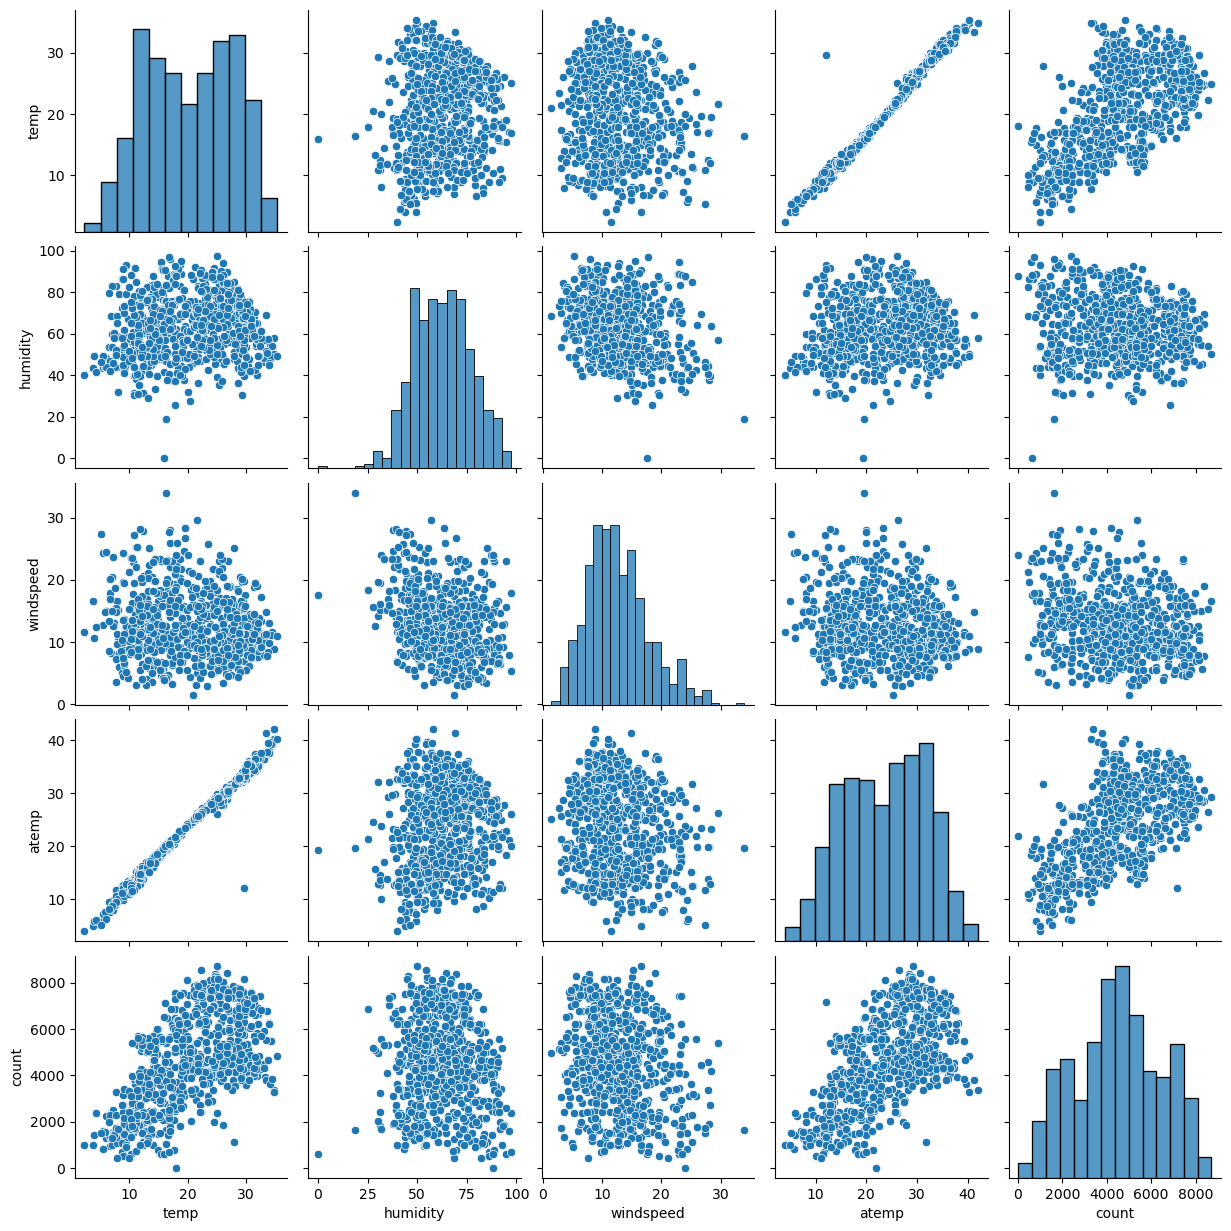

In [254]:
# using Pairplot to visualize the corelation of count with other numerical variables 
#Pairplot for numeric variables
sns.pairplot(bikeData, vars=["temp", "humidity",'windspeed','atemp','count'])
plt.show()

### From the Initial Analysis 'Temp' varaiable is positively corelated with Count

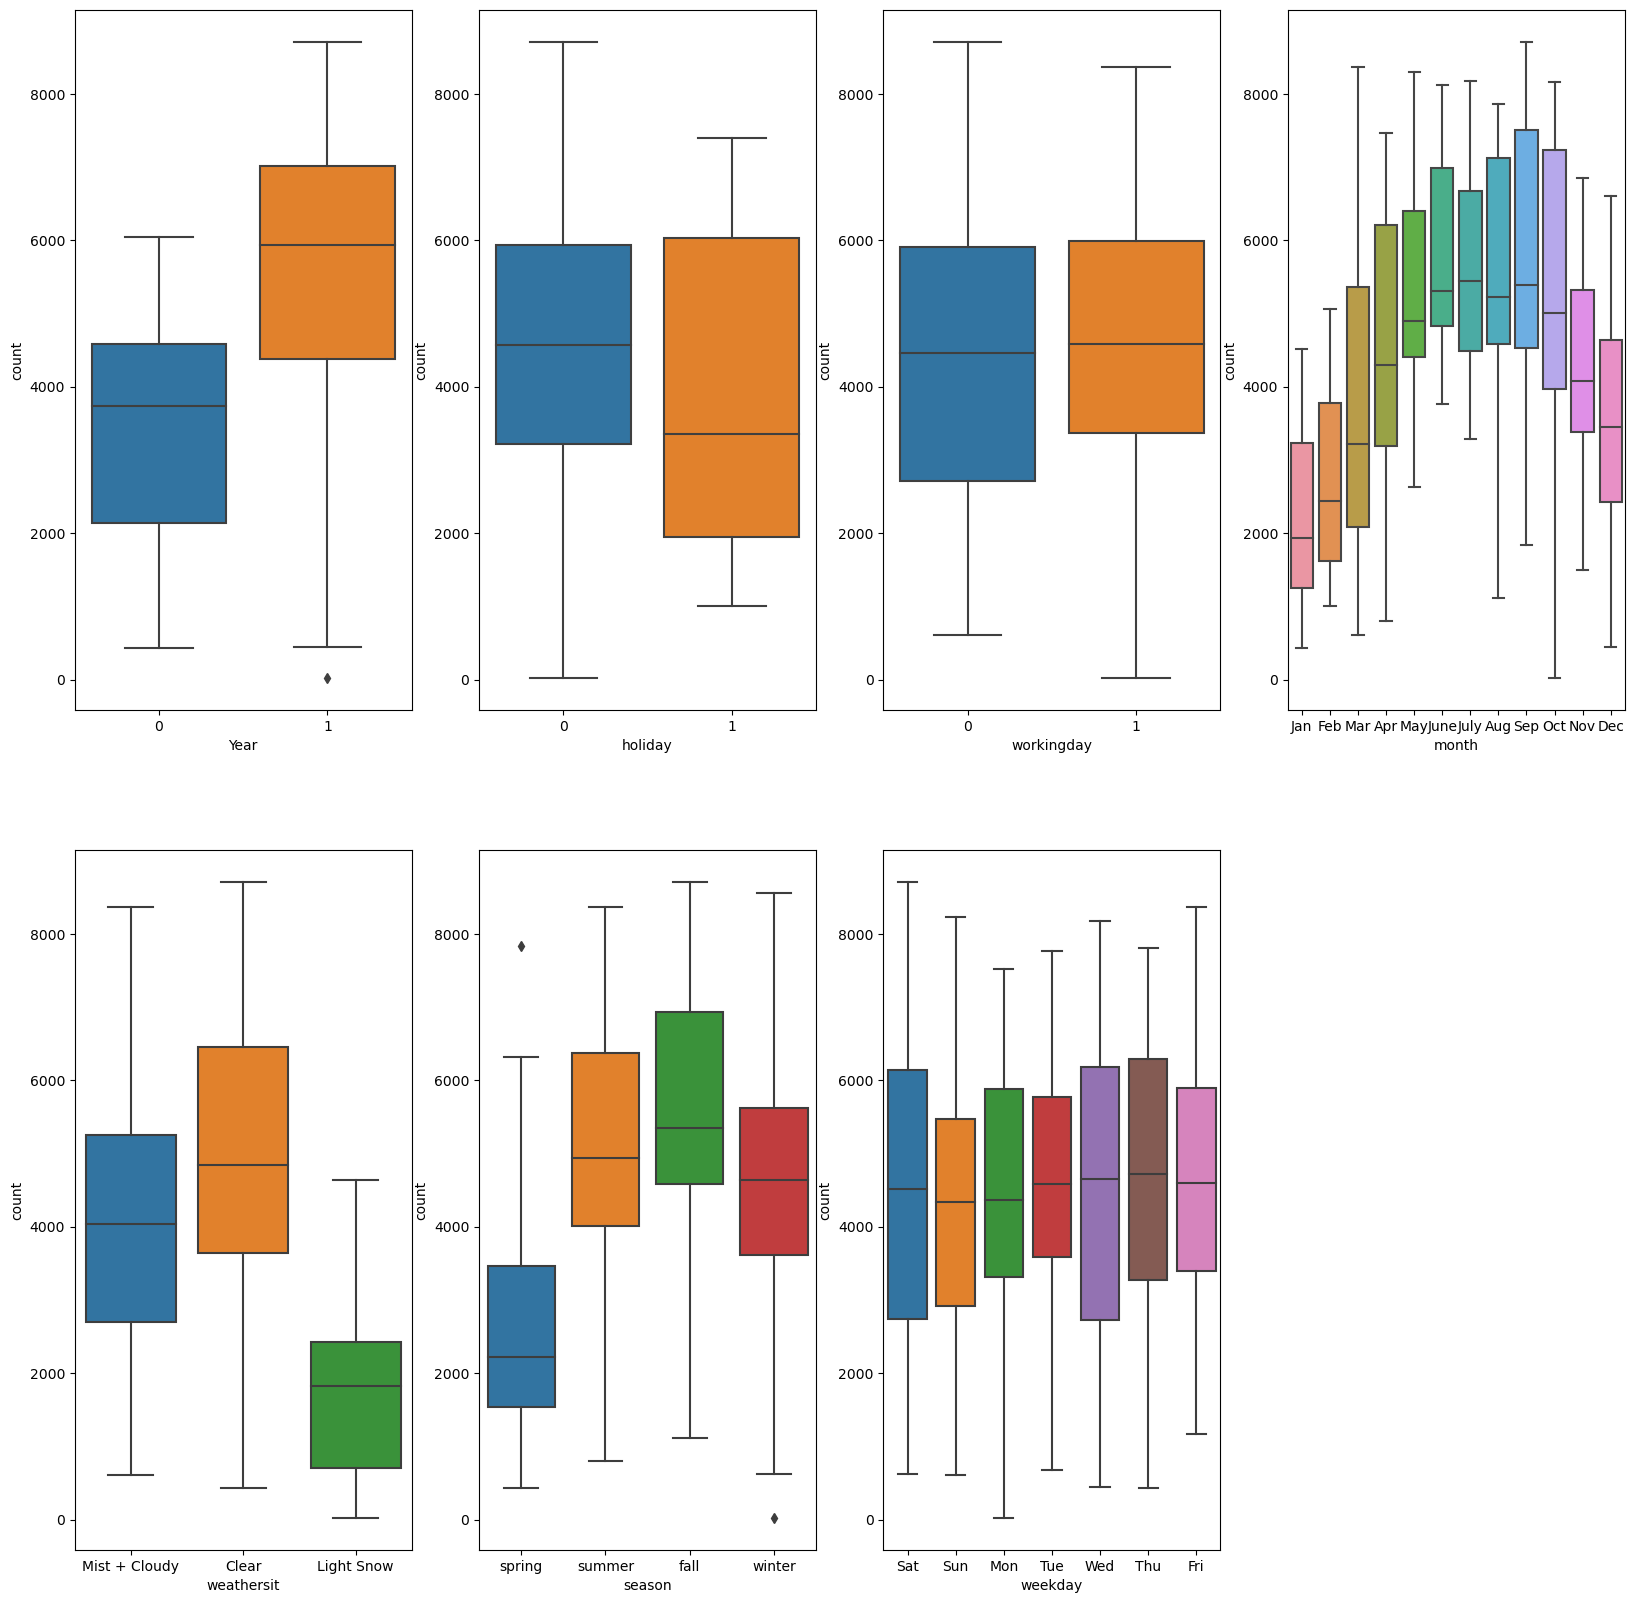

In [255]:
#Visualzing the Categorial Variables

plt.figure(figsize=(20, 20))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bikeData)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bikeData)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bikeData)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bikeData)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bikeData)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bikeData)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bikeData)
plt.show()

### Following are the observations after visiualing the Categorical variables
#### 1. Bike Rentals are more in 2019 than 2018
#### 2. Bike Rentals are more in August , September and October (considering continous months)
#### 3. Bike Rentals are more when weather is Clear (Clear, Few clouds, Partly cloudy)
#### 4. Bike Rentals are more in Summer and Fall seasons
#### 5. Bike Rentals are more in Saturday , Wednesday and Thursday

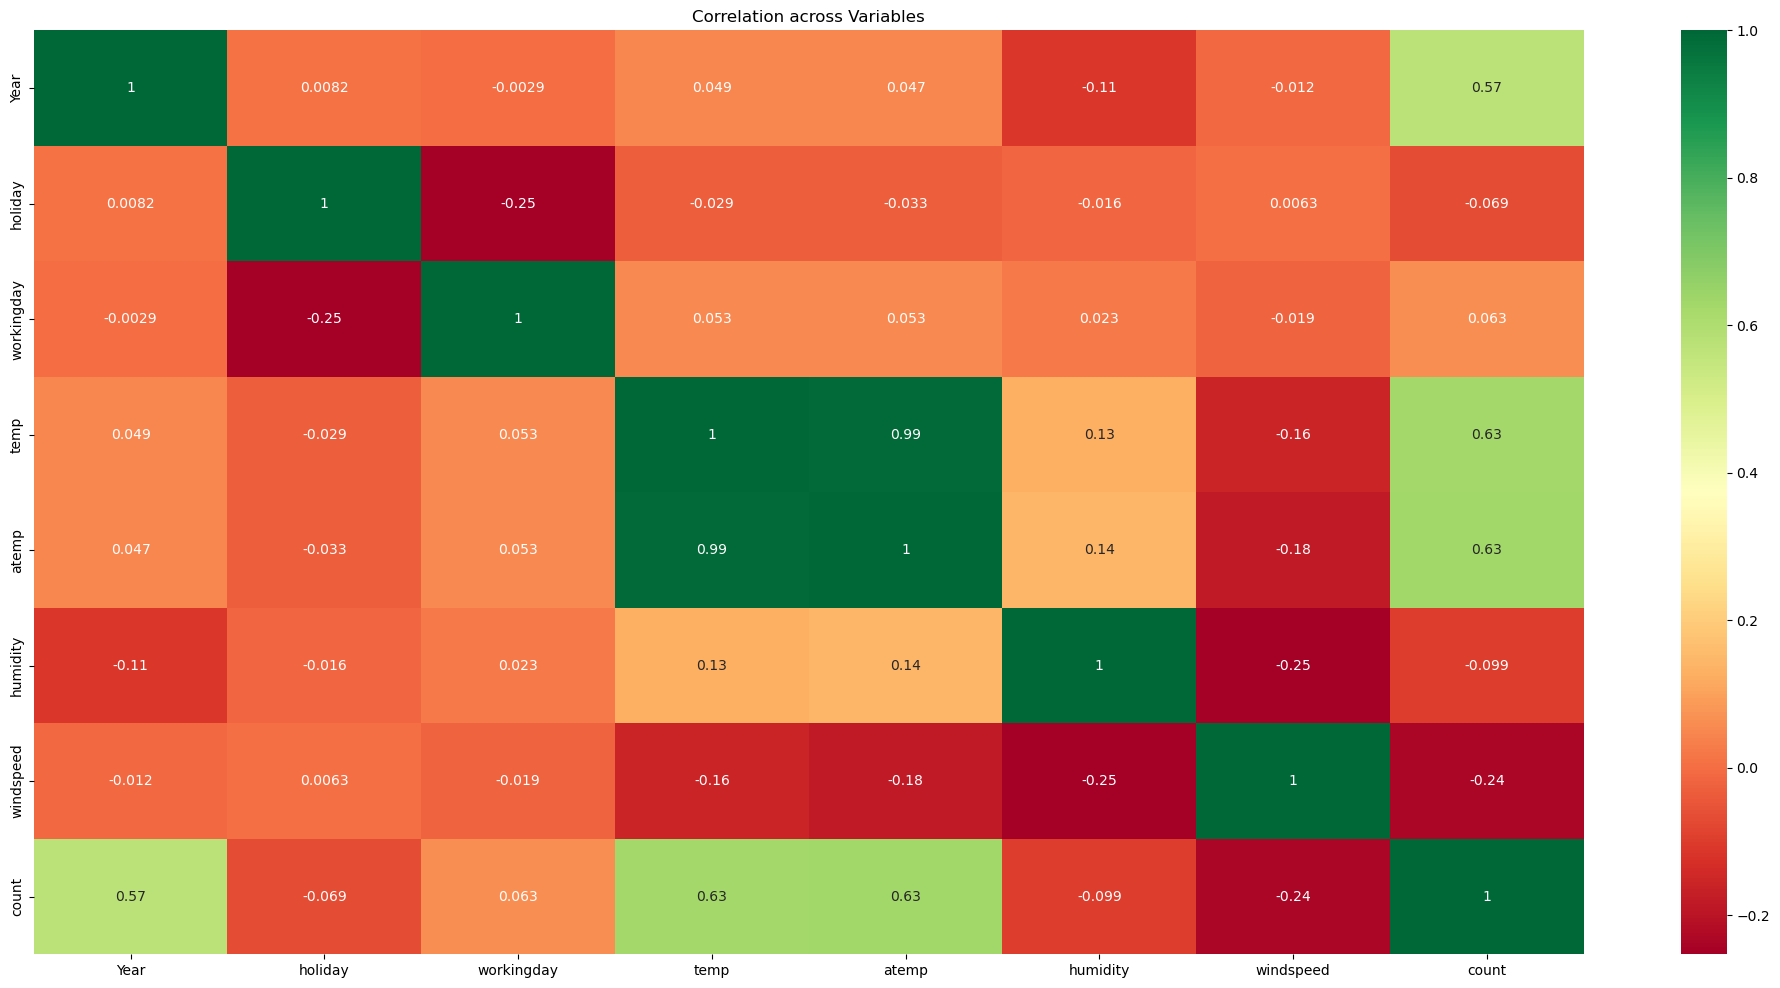

In [256]:
# Visualizing the corelation of the variables using a heatmap
plt.figure(figsize=(25, 12))
sns.heatmap(bikeData.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation across Variables")
plt.show()

### From the Pairplots and Heatmap , we can see some of the variables(Temp and aTemp) are corelated to count , hence we can use the linear corelation model

## Step 3 : Data Preparation 


In [257]:
# using the Dummy variables to represent the Categorical variables
months=pd.get_dummies(bikeData.month,drop_first=True)
weekdays=pd.get_dummies(bikeData.weekday,drop_first=True)
weather_sit=pd.get_dummies(bikeData.weathersit,drop_first=True)
seasons=pd.get_dummies(bikeData.season,drop_first=True)

In [258]:
bikeData = pd.concat([months,weekdays,seasons,weather_sit,bikeData],axis=1)
bikeData.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [259]:
# dropping the initial categorical variables
# dropping atemp as it is another representation of the temperature
bikeData.drop(['season','month','weekday','weathersit','atemp'], axis = 1, inplace = True)
bikeData.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,winter,Light Snow,Mist + Cloudy,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [260]:
bikeData.shape

(730, 29)

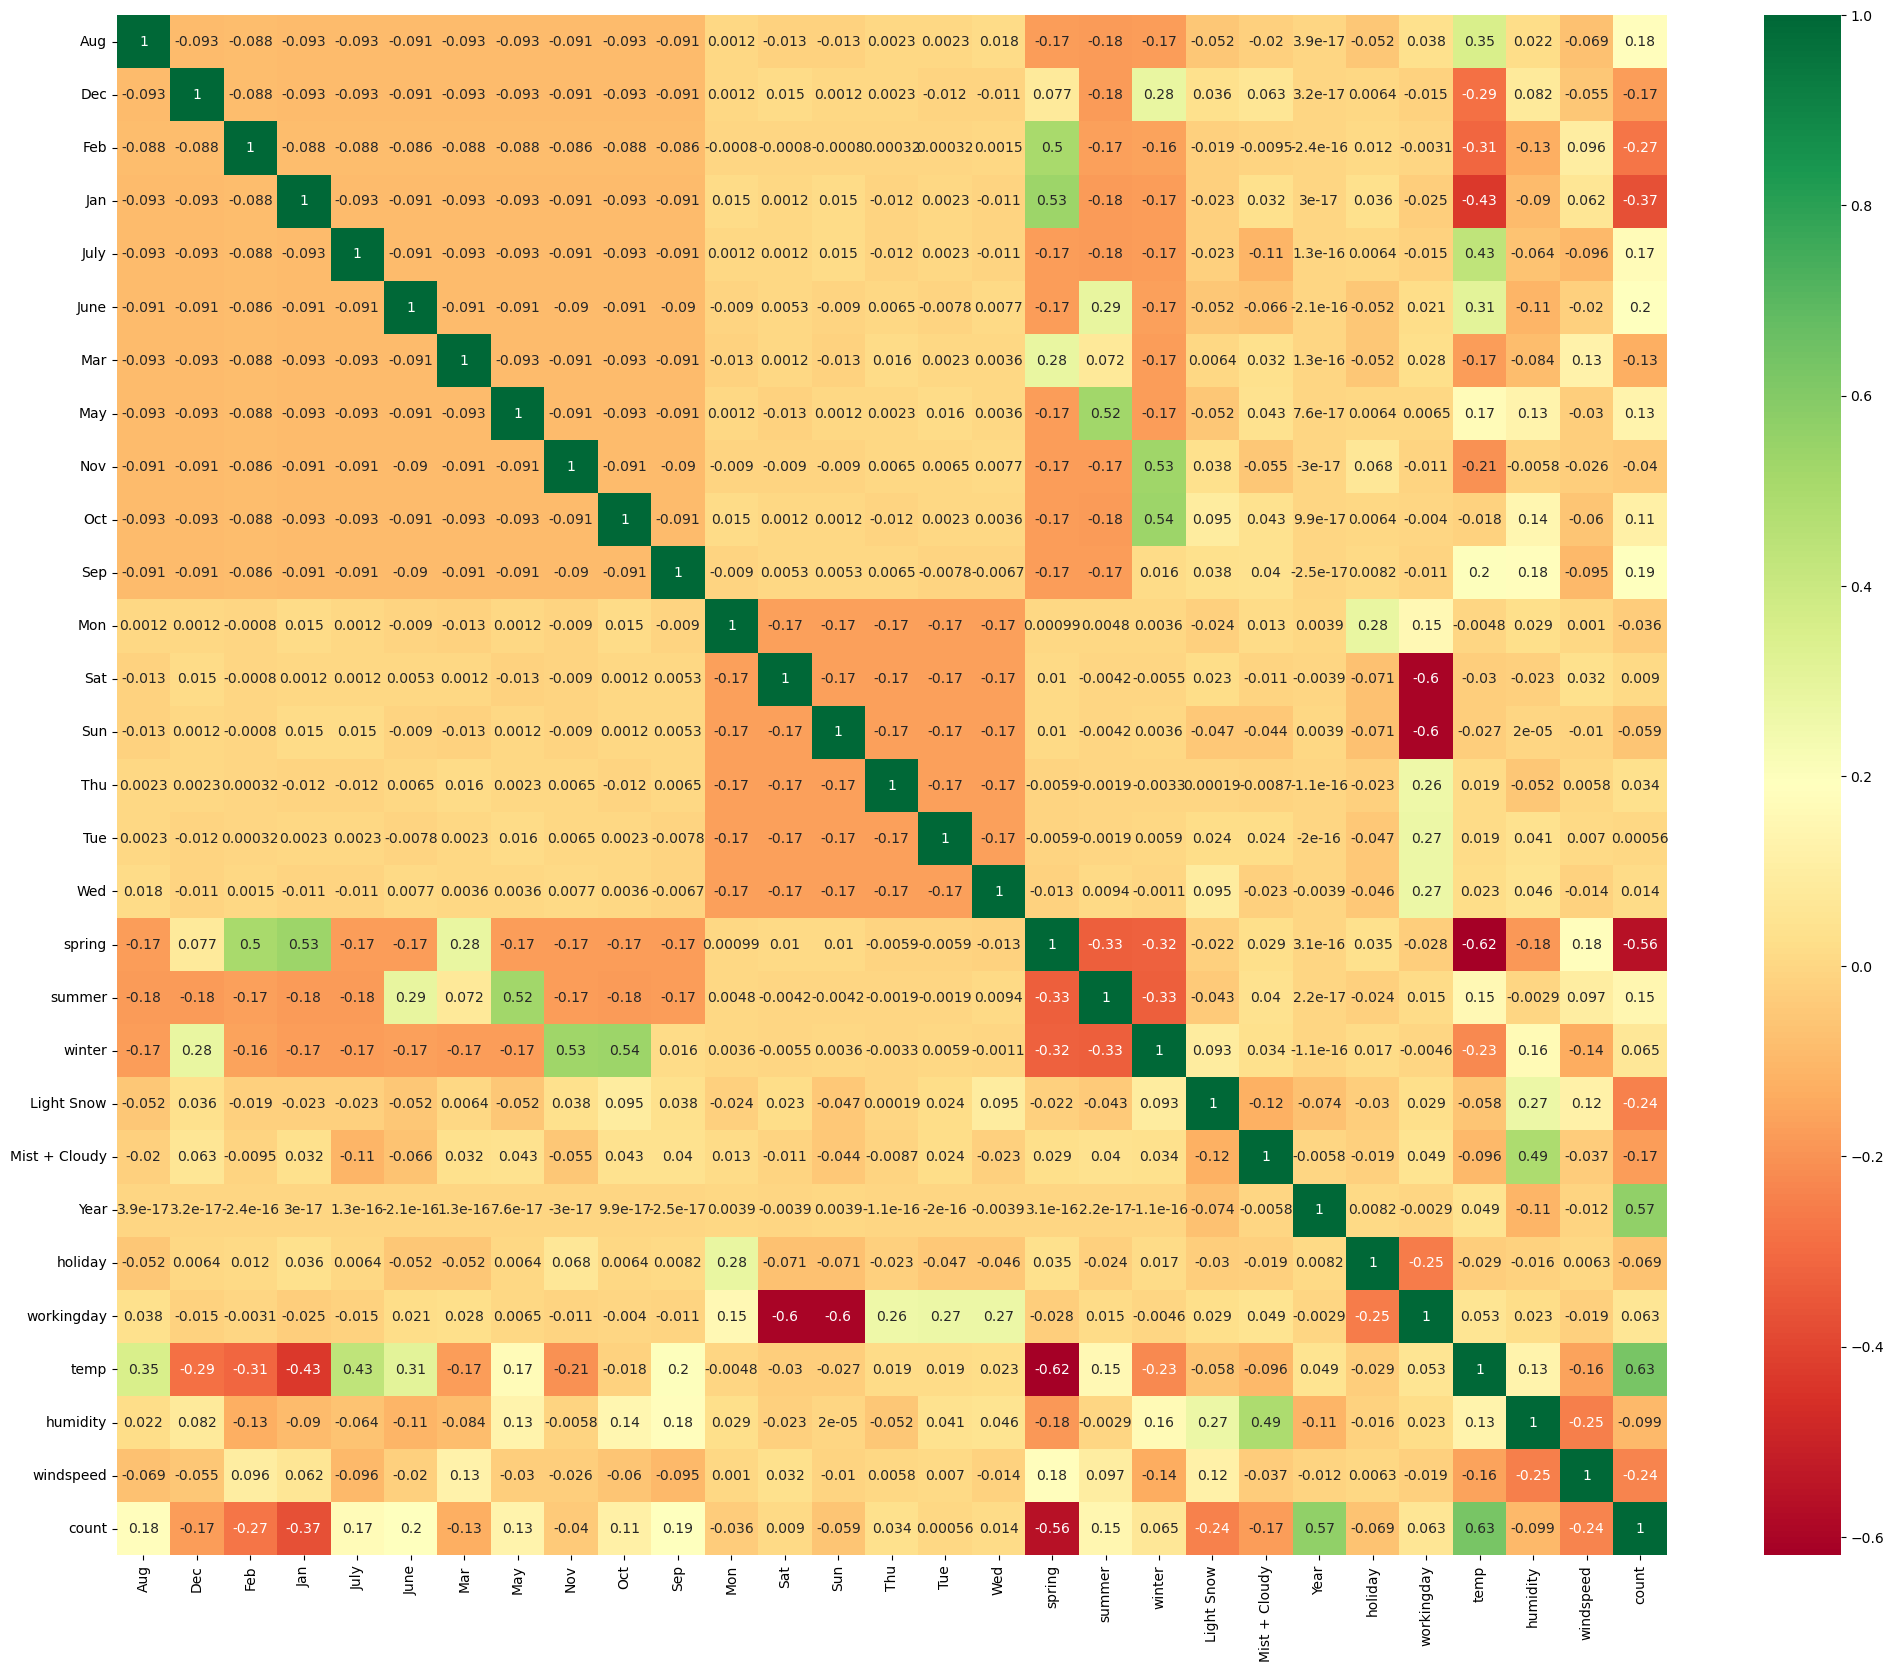

In [261]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(bikeData.corr(), cmap='RdYlGn', annot = True)
plt.show()

### Factors that positively influence the bike rentals after introducing the dummy variables 

1. Temparature
2. Season : summer 
3. Months : June to October


## Step 4 : Splitting the data into Testing and Training Data sets

In [262]:
bike_train, bike_test = train_test_split(bikeData, train_size = 0.7, random_state = 100)

print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [263]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aug            510 non-null    uint8  
 1   Dec            510 non-null    uint8  
 2   Feb            510 non-null    uint8  
 3   Jan            510 non-null    uint8  
 4   July           510 non-null    uint8  
 5   June           510 non-null    uint8  
 6   Mar            510 non-null    uint8  
 7   May            510 non-null    uint8  
 8   Nov            510 non-null    uint8  
 9   Oct            510 non-null    uint8  
 10  Sep            510 non-null    uint8  
 11  Mon            510 non-null    uint8  
 12  Sat            510 non-null    uint8  
 13  Sun            510 non-null    uint8  
 14  Thu            510 non-null    uint8  
 15  Tue            510 non-null    uint8  
 16  Wed            510 non-null    uint8  
 17  spring         510 non-null    uint8  
 18  summer  

#### Rescaling the variables using Min Max Scaling(Normalization) to that all the variables are in a common scale between 0 and 1

In [264]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars=['temp','humidity','windspeed','count']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,winter,Light Snow,Mist + Cloudy,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.345824,0.751824,0.380981,0.191095


In [265]:
# Analysing the data distribution after Min Max Scaling 
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,winter,Light Snow,Mist + Cloudy,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.247059,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.431725,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Now all the Numerical variables are between 0 and 1 , lets analyze the Multicollinearity across the Predictor variables

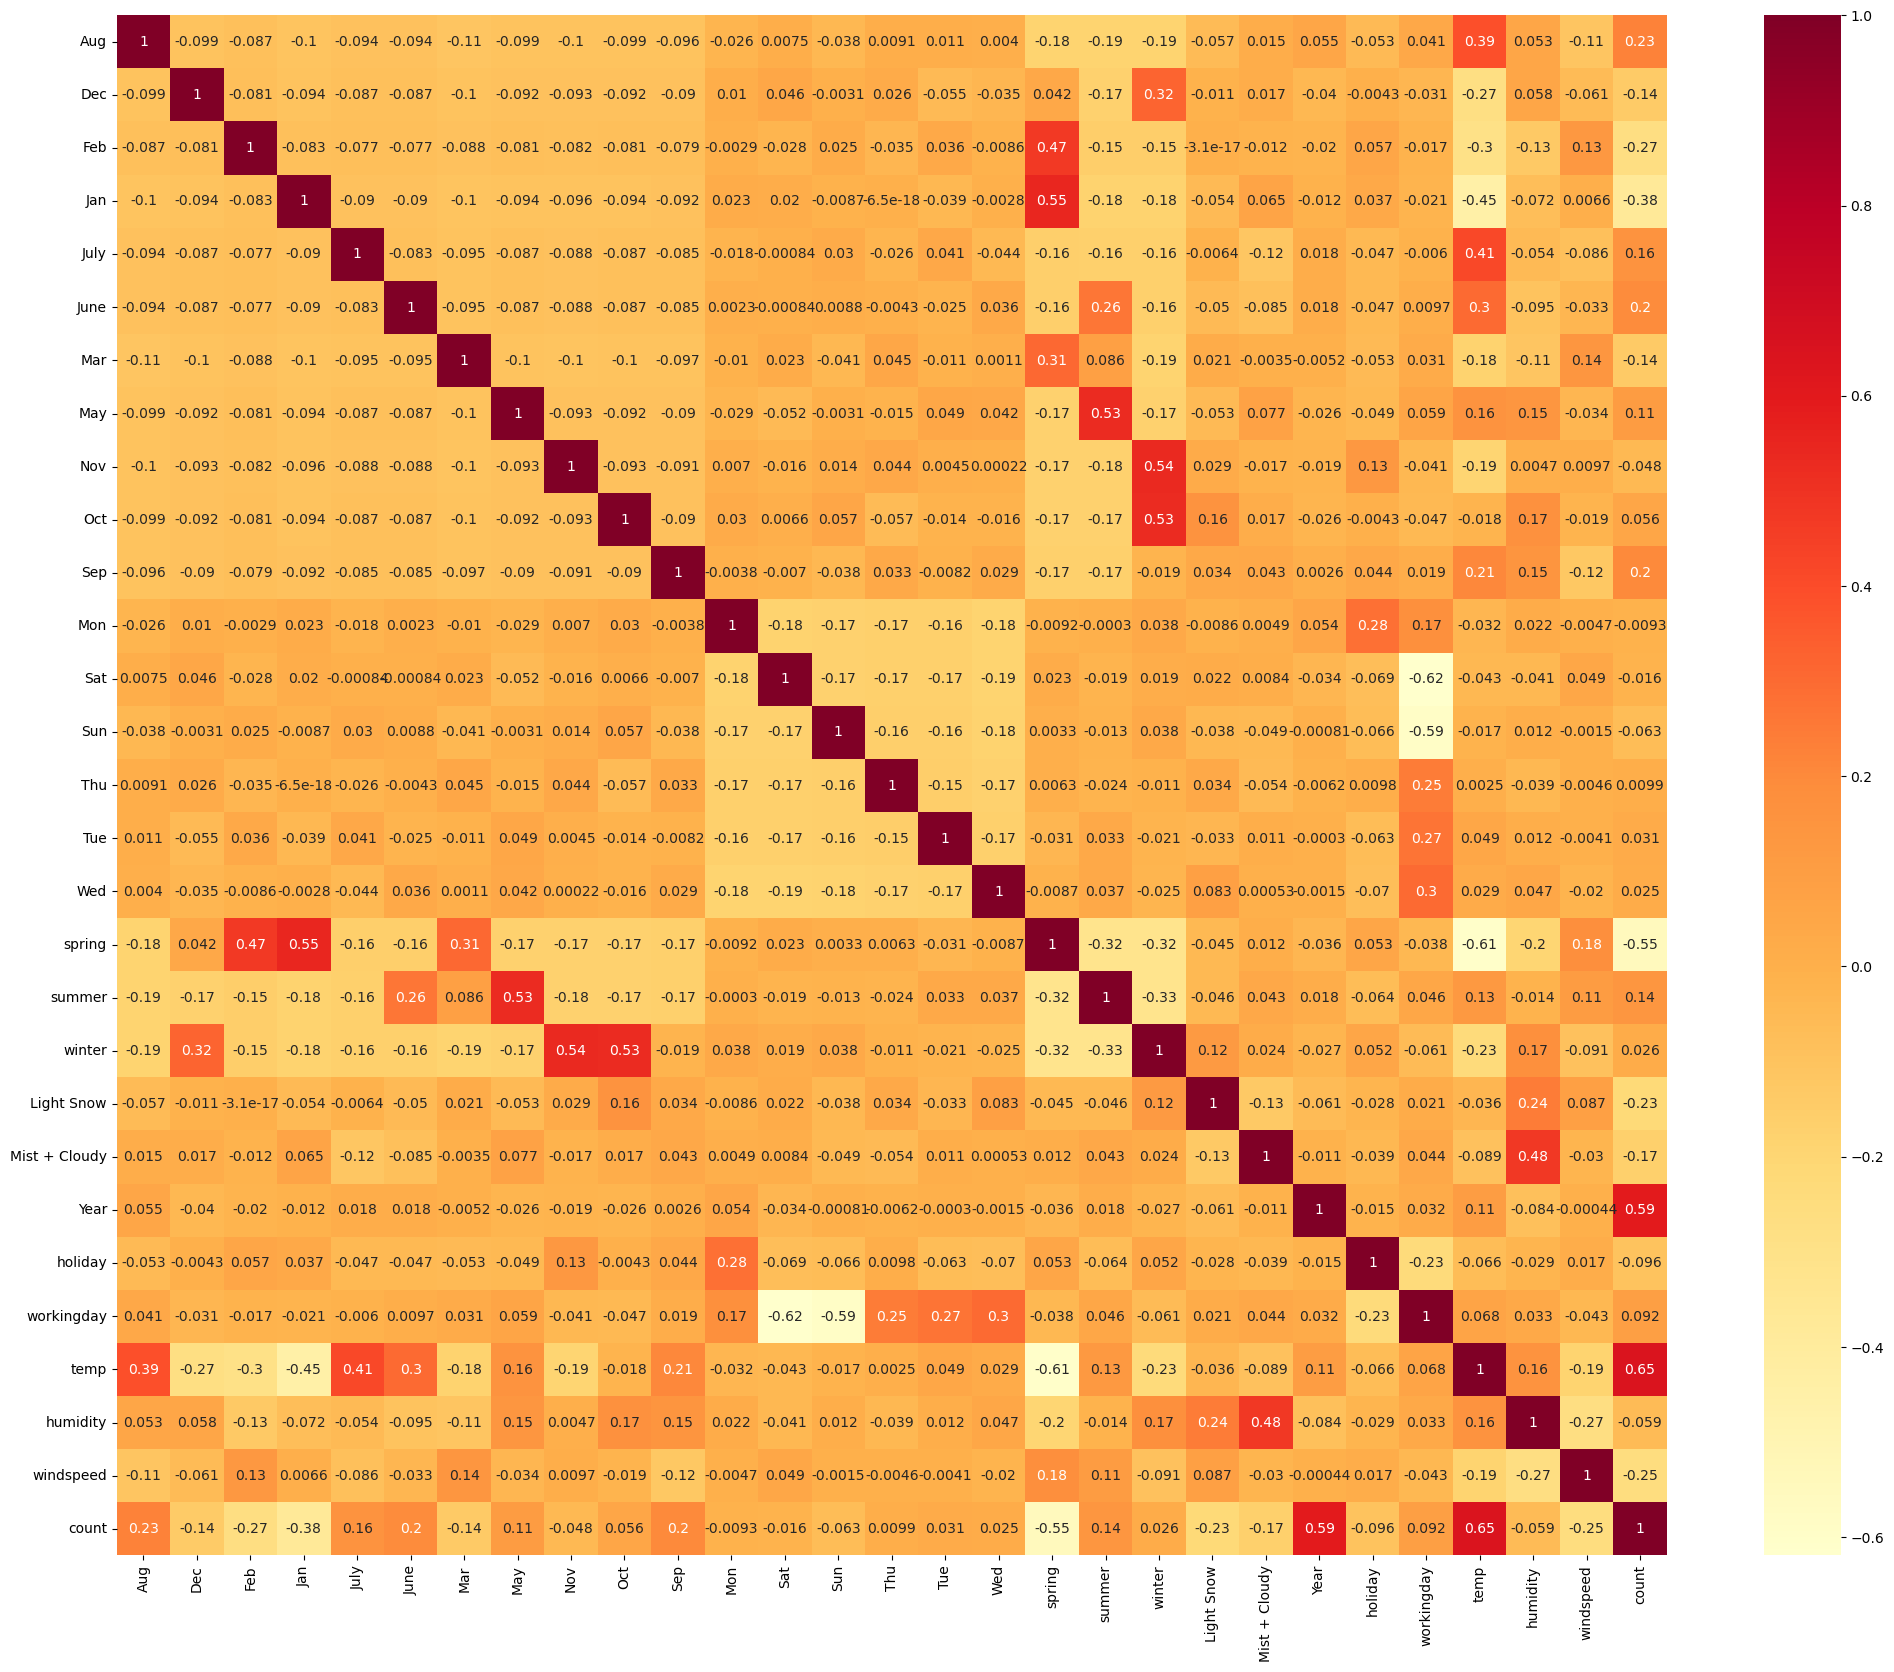

In [266]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

### Observations on MultiColinearity

1. Temperature variable is high on June to August
2. Humidity is Corelated to 'Misty + Cloudy variable'

In [267]:
# #Divide the data into X and y axis
y_train = bike_train.pop('count')
X_train = bike_train

## Step 5 : Building the Linear Regression Model

#### 1. We would use the RFE (Recursive Feature Elimination) technique to arrive at the optimium set of variables that influence bike rentals
#### 2. We would use the LinearRegression and RFE library from sklearn.

In [268]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [269]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)         
rfe = rfe.fit(X_train, y_train)

In [270]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [271]:
# selecting the RFE true variables
colWithRFE = X_train.columns[rfe.support_]
colWithRFE

Index(['July', 'Sep', 'Sat', 'Sun', 'spring', 'summer', 'winter', 'Light Snow',
       'Mist + Cloudy', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

#### Studying the results from statsmodel api for comprehensive analysis

In [278]:
import statsmodels.api as sm  

X_train_rfe = X_train[colWithRFE]
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 17 May 2023   Prob (F-statistic):          2.11e-191
Time:                        23:08:57   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200

### Calculating and checking VIF 
VIF (Variance Inflation Factor) is used to quantify how the features are corelated.


In [279]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [280]:
#calcuate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,50.68
2,Sat,12.20
3,Sun,11.79
4,spring,5.02
12,temp,3.62
6,winter,3.49
10,holiday,2.91
5,summer,2.62
13,humidity,1.91
8,Mist + Cloudy,1.57


 ##### 'holiday' feature can be dropped due to the High P value 

In [281]:
X_train_new1 = X_train_rfe.drop(["holiday"], axis = 1)

In [282]:
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 17 May 2023   Prob (F-statistic):          2.11e-191
Time:                        23:09:20   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1811      0.042      4.301

In [283]:
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [284]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,32.10
11,temp,18.99
10,workingday,18.41
2,Sat,4.91
13,windspeed,4.91
4,spring,4.80
3,Sun,4.76
6,winter,3.69
5,summer,3.04
8,Mist + Cloudy,2.31


#### 'Humidity' is having a large VIF value (denoting insignificance) hence lets drop it


In [285]:
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

In [286]:
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.28e-188
Time:                        23:09:51   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1008      0.038      2.624

In [287]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [288]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,16.19
11,temp,12.74
12,windspeed,4.76
2,Sat,4.45
3,Sun,4.21
4,spring,3.82
6,winter,2.78
5,summer,2.76
9,Year,2.07
0,July,1.60


#### 'windspeed' is having a large VIF value and Negative Corelation

In [289]:
X_train_new3 = X_train_lm2.drop(["windspeed"], axis = 1)

In [290]:
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.7
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.30e-182
Time:                        23:10:27   Log-Likelihood:                 490.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     497   BIC:                            -899.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0484      0.039      1.249

In [291]:
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [292]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,15.73
11,temp,12.54
2,Sat,4.31
3,Sun,4.11
4,spring,3.48
6,winter,2.71
5,summer,2.60
9,Year,2.07
0,July,1.60
8,Mist + Cloudy,1.59


#### 'july' can be dropped due to negative corelation

In [293]:
X_train_new4 = X_train_lm3.drop(["July"], axis = 1)

In [294]:
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.8
Date:                Wed, 17 May 2023   Prob (F-statistic):          6.52e-182
Time:                        23:11:34   Log-Likelihood:                 486.70
No. Observations:                 510   AIC:                            -949.4
Df Residuals:                     498   BIC:                            -898.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0412      0.039      1.061

In [295]:
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [296]:
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,15.64
10,temp,11.72
1,Sat,4.28
2,Sun,4.07
3,spring,3.33
5,winter,2.49
4,summer,2.22
8,Year,2.07
7,Mist + Cloudy,1.58
0,Sep,1.23


#### 'Sun' can be dropped due to high p value


In [297]:
X_train_new5 = X_train_lm4.drop(["Sun"], axis = 1)

In [298]:
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.10e-182
Time:                        23:11:55   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0902      0.030      2.964

In [299]:
X_train_lm5= X_train_lm5.drop(['const'], axis=1)

In [300]:
vif = pd.DataFrame()
X =X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.72
8,workingday,4.63
7,Year,2.07
1,Sat,1.81
3,summer,1.75
2,spring,1.70
4,winter,1.59
6,Mist + Cloudy,1.57
0,Sep,1.23
5,Light Snow,1.07


### Based on measures of P value (<=0.05) and dropping variables whose VIF > 10 , we have arrived at the optimal linear regression model

#### The R value (which denotes the strenght of variables and model ) for the refined model is : 82.6 

#### The Adjusted R value(taking into account the number of variables used) for the model is 82.2% 

## Step 6 : Residual Analysis of the train data


In [308]:
X_train_lm5

,Sep,Sat,spring,summer,winter,Light Snow,Mist + Cloudy,Year,workingday,temp
576,0,0,0,0,0,0,0,1,1,0.815169
426,0,1,1,0,0,0,1,1,0,0.442393
728,0,0,1,0,0,0,0,1,0,0.245101
482,0,1,0,1,0,0,1,1,0,0.395666
111,0,0,0,1,0,0,1,0,1,0.345824
...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,1,1,0.863973
53,0,0,1,0,0,0,0,0,1,0.202618
350,0,1,0,0,1,0,1,0,0,0.248216
79,0,0,0,1,0,0,1,0,1,0.462664


In [313]:
lm5 = LinearRegression()
lm5.fit(X_train_new5, y_train)

LinearRegression()

In [314]:
y_train_pred = lm5.predict(X_train_lm5)

In [315]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\visylves\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 640x480 with 0 Axes>

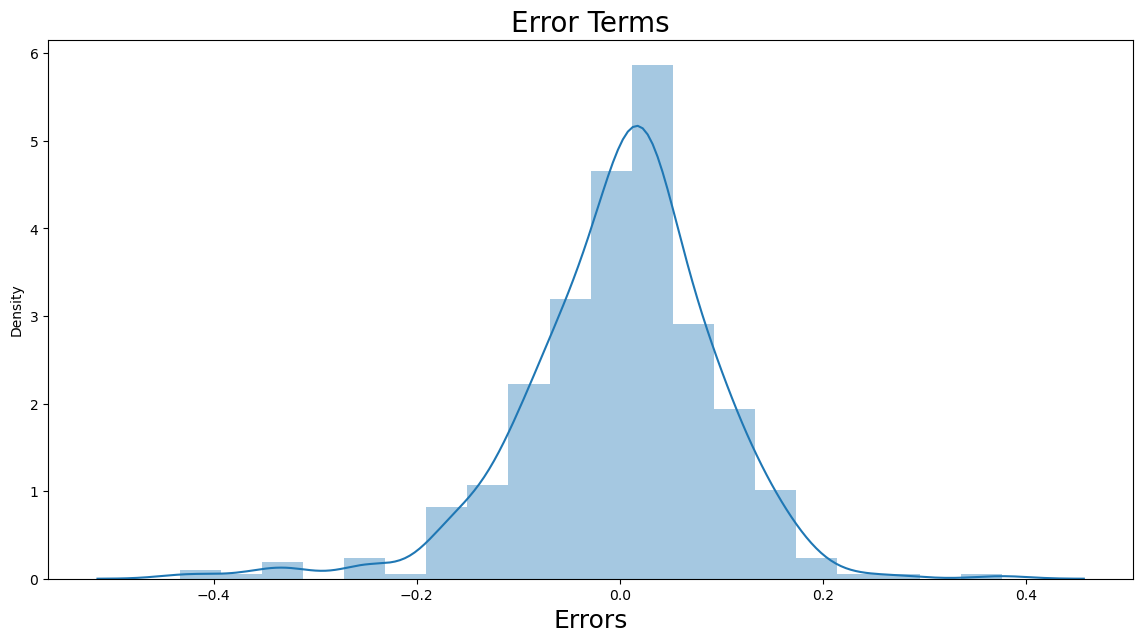

In [316]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

## Step 7 Making predictions


In [317]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,winter,Light Snow,Mist + Cloudy,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [318]:
#Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,Light Snow,Mist + Cloudy,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.263636,0.236364,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.441609,0.425817,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [319]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Sat,spring,summer,winter,Light Snow,Mist + Cloudy,Year,workingday,temp
184,1.0,0,0,0,0,0,0,1,0,0,0.831783
535,1.0,0,0,0,1,0,0,0,1,1,0.901354
299,1.0,0,0,0,0,1,0,1,0,1,0.511964
221,1.0,0,0,0,0,0,0,0,0,1,0.881625
152,1.0,0,0,0,1,0,0,0,0,1,0.817246


In [322]:
lm5 = LinearRegression()
lm5.fit(X_test_new1, y_test)

LinearRegression()

In [324]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

In [326]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8206603918209061

In [328]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


### Step 8 : Model Evaluation


Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

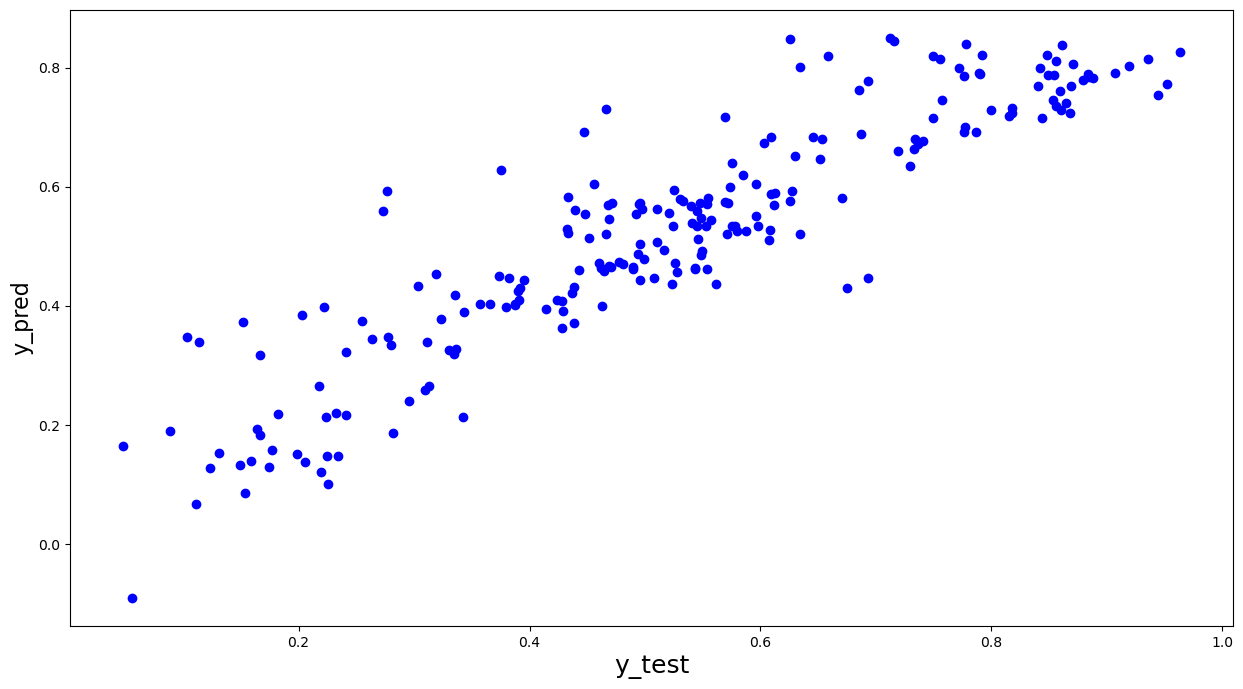

In [329]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

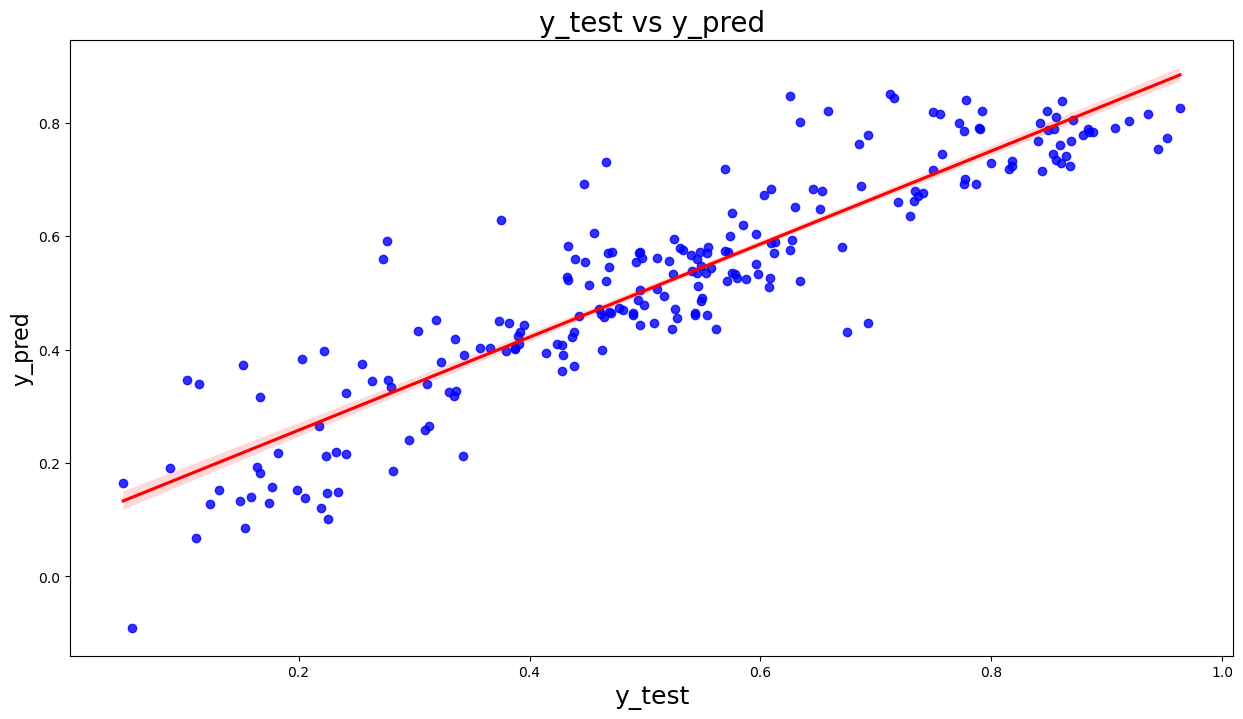

In [330]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

The Equation is as follows
count=0.4914×temp+0.0916×September+0.0645×Saturday+0.0527×summer+0.0970×winter+0.2334×Year+0.0566×workingday−0.03041×lightsnow−0.0786×mistcloudy−0.065×spring

### Interpration : 

1. The Difference between R and Adjusted R on Test data is 3%
2. Both R and Adjusted R are high hene the strenght of variable is explained
3. Temperature is the major influencer , followed by September , Saturday and Summer